$$Diego \space Castillo \space Reyes$$

<h1 align="center">Teleportación cuántica</h1>
Desarrolla el algoritmo de teleportacion cuantica en qiskit

In [1]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

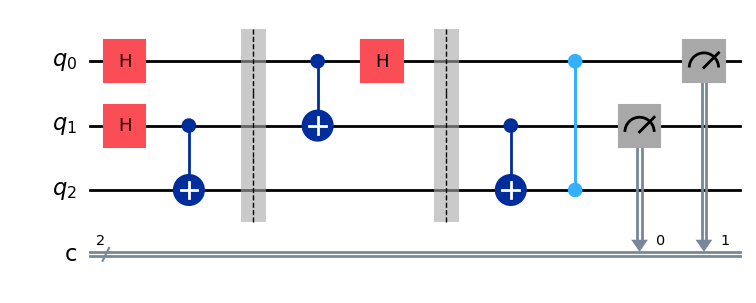

In [2]:
# Define the quantum circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

# define the message 1/sqrt(2)(alpha|0> + beta|1>)
qc.h(0)
# Create the Bell state |β00⟩
qc.h(1)
qc.cx(1, 2)
qc.barrier()
# apply CNOT(q0, q1)
qc.cx(0, 1)
# apply H(q0)
qc.h(0)
qc.barrier()
# Apply bob's gates
qc.cx(1, 2)
qc.cz(0, 2)
# measure q0 and q1
qc.measure([0, 1], [1, 0])

# Draw the circuit
qc.draw('mpl')

Statevector([0.   +0.j, 0.   +0.j, 0.   +0.j, 0.707+0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707-0.j],
            dims=(2, 2, 2))


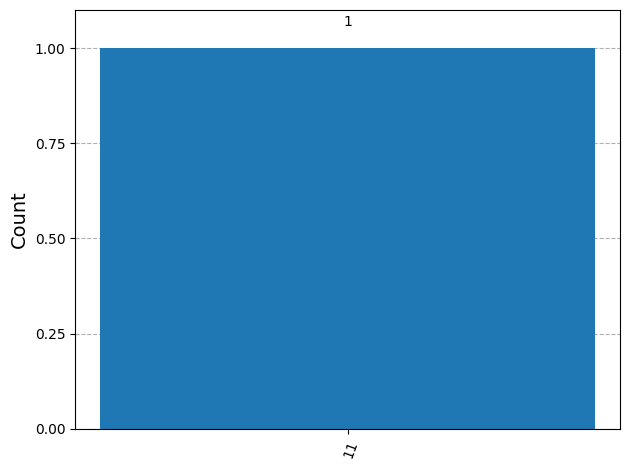

In [ ]:
# Define the simulator
backend = Aer.get_backend("statevector_simulator")

# Compile the circuit on the computer or simulator
compiled_circuit = transpile(qc, backend=backend)
# Execute the circuit on the simulator
job = backend.run(compiled_circuit, shots=1)
# Get the results of the execution
result = job.result()
# Get the counts of the results
counts = result.get_counts(qc)
# print the results as a state vector
print(result.get_statevector(compiled_circuit, decimals=3))
# Draw the histogram of the results
plot_histogram(counts)
# State vector [000, 010, 100, 110, 001, 011, 101, 111]